<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r0_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [3]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r0-good.csv?token=AKVFSOA5R7RSRXE4SUE4GIK6XZYYK"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r0-mal.csv?token=AKVFSOEYCAYDJKN7ZCIQAXC6XZYYM"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [6]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,0,4,0,0.0,4,6,1,6,6,36,0,1,4,0,3,27,9,1
1,87,0,2,4,1,1,5,17,18,2,0,0,0,2,2,1.0,13,5,2,6,10,60,0,4,4,0,20,85,100,1
2,88,0,2,4,2,2,5,17,18,2,0,0,0,2,2,1.0,14,4,3,6,12,72,0,8,16,0,20,85,100,1
3,89,0,2,4,3,2,5,17,18,2,0,0,0,2,2,1.0,15,3,4,6,12,72,0,12,24,0,20,85,100,1
4,90,0,2,4,4,2,5,17,18,2,0,0,0,2,2,1.0,16,2,5,6,10,60,0,16,32,0,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64411,3251154,2,0,5,2,2,3,11,0,0,22,6,10024,3,0,0.0,11,5,7,11,35,385,0,10,20,200480,15,33,45,1
64412,3251161,2,0,5,3,2,3,11,0,0,22,6,10024,3,0,0.0,18,4,8,11,32,352,0,15,30,300720,15,33,45,1
64413,3251168,2,0,5,4,2,3,11,0,0,22,6,10024,3,0,0.0,25,3,9,11,27,297,0,20,40,400960,15,33,45,1
64414,3251175,2,0,5,5,3,3,11,0,0,22,6,10024,3,0,0.0,32,2,10,11,20,220,0,25,75,751800,15,33,45,1


In [7]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,0,4,0,0.000000,4,1,1,1,1,1,0,1,4,0,3,27,9,0
1,104,0,2,4,1,1,5,17,18,2,0,0,0,2,2,1.000000,12,7,1,7,7,49,0,4,4,0,20,85,100,0
2,105,1,2,1,1,4,3,9,1,1,24,8,2,3,1,0.333333,8,6,2,7,12,84,2,1,4,8,3,27,9,0
3,106,0,2,4,2,2,5,17,18,2,0,0,0,2,2,1.000000,14,5,3,7,15,105,0,8,16,0,20,85,100,0
4,107,0,2,4,3,2,5,17,18,2,0,0,0,2,2,1.000000,15,4,4,7,16,112,0,12,24,0,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41202,2011346,0,2,4,1,1,5,17,17,1,0,0,11077,1,1,1.000000,8,1,1,1,1,1,0,4,4,44308,20,85,100,0
41203,2011347,0,2,4,2,2,5,17,17,1,0,0,11077,1,1,1.000000,9,1,1,1,1,1,0,8,16,177232,20,85,100,0
41204,2011348,0,2,4,3,2,5,17,17,1,0,0,11077,1,1,1.000000,10,1,1,1,1,1,0,12,24,265848,20,85,100,0
41205,2011349,0,2,4,4,2,5,17,17,1,0,0,11077,1,1,1.000000,11,1,1,1,1,1,0,16,32,354464,20,85,100,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [11]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,0,4,0,0.0,4,6,1,6,6,36,0,1,4,0,3,27,9,1
1,7,2,0,1,1,4,3,9,0,0,23,7,0,4,0,0.0,4,1,1,1,1,1,0,1,4,0,3,27,9,0
2,87,0,2,4,1,1,5,17,18,2,0,0,0,2,2,1.0,13,5,2,6,10,60,0,4,4,0,20,85,100,1
3,88,0,2,4,2,2,5,17,18,2,0,0,0,2,2,1.0,14,4,3,6,12,72,0,8,16,0,20,85,100,1
4,89,0,2,4,3,2,5,17,18,2,0,0,0,2,2,1.0,15,3,4,6,12,72,0,12,24,0,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105618,3251154,2,0,5,2,2,3,11,0,0,22,6,10024,3,0,0.0,11,5,7,11,35,385,0,10,20,200480,15,33,45,1
105619,3251161,2,0,5,3,2,3,11,0,0,22,6,10024,3,0,0.0,18,4,8,11,32,352,0,15,30,300720,15,33,45,1
105620,3251168,2,0,5,4,2,3,11,0,0,22,6,10024,3,0,0.0,25,3,9,11,27,297,0,20,40,400960,15,33,45,1
105621,3251175,2,0,5,5,3,3,11,0,0,22,6,10024,3,0,0.0,32,2,10,11,20,220,0,25,75,751800,15,33,45,1


In [12]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.013807,-0.067276,0.031658,0.004548,-0.007083,-0.018894,-0.026316,0.000976,0.028764,0.027445,0.051253,0.842827,0.054089,0.013272,-0.028485,0.034316,0.010044,0.010062,0.013430,-0.009038,-0.027036,-0.066240,0.012817,0.011327,0.463736,0.011156,-0.021931,-0.006662,0.377815
outport,0.013807,1.000000,-0.790406,-0.015669,-0.006579,0.010260,-0.751970,-0.677207,-0.787678,-0.572550,0.866679,0.671296,0.023929,0.143094,-0.700338,-0.903736,0.098874,-0.147330,0.095596,-0.034554,-0.010302,0.002851,0.023307,0.101018,0.045578,0.049636,-0.610611,-0.728143,-0.771683,-0.007255
inport,-0.067276,-0.790406,1.000000,-0.047279,0.022681,-0.035374,0.711242,0.631137,0.600307,0.237710,-0.748764,-0.553036,-0.038312,-0.232469,0.447640,0.871021,-0.236461,0.112307,-0.074024,0.025570,0.017291,0.009885,0.250430,-0.088556,-0.050004,-0.059603,0.526200,0.685035,0.705230,-0.072910
cache_coherence_type,0.031658,-0.015669,-0.047279,1.000000,0.124621,-0.194361,-0.239823,-0.310646,0.064725,0.029152,-0.060461,-0.056551,0.038600,-0.014751,0.036586,0.007002,-0.315747,0.079077,-0.100862,-0.014551,0.018872,0.026380,-0.049842,0.355574,0.334194,0.257858,0.636115,-0.269230,0.152940,0.002444
flit_id,0.004548,-0.006579,0.022681,0.124621,1.000000,0.047642,0.193325,0.191983,0.002780,0.012526,-0.017234,-0.003646,0.002202,0.001945,0.003278,0.013353,0.422861,-0.111090,0.136641,0.017066,0.060202,0.035473,-0.038684,0.957343,0.898405,0.648221,0.256680,0.194189,0.246277,0.007555
flit_type,-0.007083,0.010260,-0.035374,-0.194361,0.047642,1.000000,-0.301513,-0.299421,-0.004336,-0.019535,0.026879,0.005687,-0.003434,-0.003033,-0.005112,-0.020825,0.510252,-0.162911,0.140862,-0.014727,-0.058818,-0.034689,0.060332,0.008354,0.278741,0.202918,-0.400323,-0.302860,-0.384098,-0.011782
vnet,-0.018894,-0.751970,0.711242,-0.239823,0.193325,-0.301513,1.000000,0.970087,0.768102,0.551479,-0.817651,-0.572290,-0.048319,0.007010,0.649034,0.829423,-0.078780,0.087113,-0.071650,0.010328,-0.002788,-0.037082,-0.143003,0.012811,-0.033387,-0.054406,0.596521,0.995487,0.922717,0.045098
vc,-0.026316,-0.677207,0.631137,-0.310646,0.191983,-0.299421,0.970087,1.000000,0.707024,0.503958,-0.754599,-0.525667,-0.058881,0.003279,0.586176,0.748226,-0.049686,0.074375,-0.049338,0.016723,0.003450,-0.032275,-0.183458,0.003606,-0.049438,-0.074429,0.514196,0.988746,0.864146,0.051211
src_ni,0.000976,-0.787678,0.600307,0.064725,0.002780,-0.004336,0.768102,0.707024,1.000000,0.837634,-0.882868,-0.669611,-0.022453,0.176658,0.900911,0.877666,0.037829,0.119061,-0.084069,0.023371,-0.004080,-0.018763,-0.108078,-0.085033,-0.029879,-0.037539,0.663989,0.749741,0.807584,0.036285
src_router,0.028764,-0.572550,0.237710,0.029152,0.012526,-0.019535,0.551479,0.503958,0.837634,1.000000,-0.612896,-0.431741,0.003937,0.515125,0.958143,0.632026,0.284444,0.077705,-0.103194,-0.017025,-0.052132,-0.069526,-0.069801,-0.060802,-0.024185,-0.018670,0.462410,0.536862,0.572949,0.047823


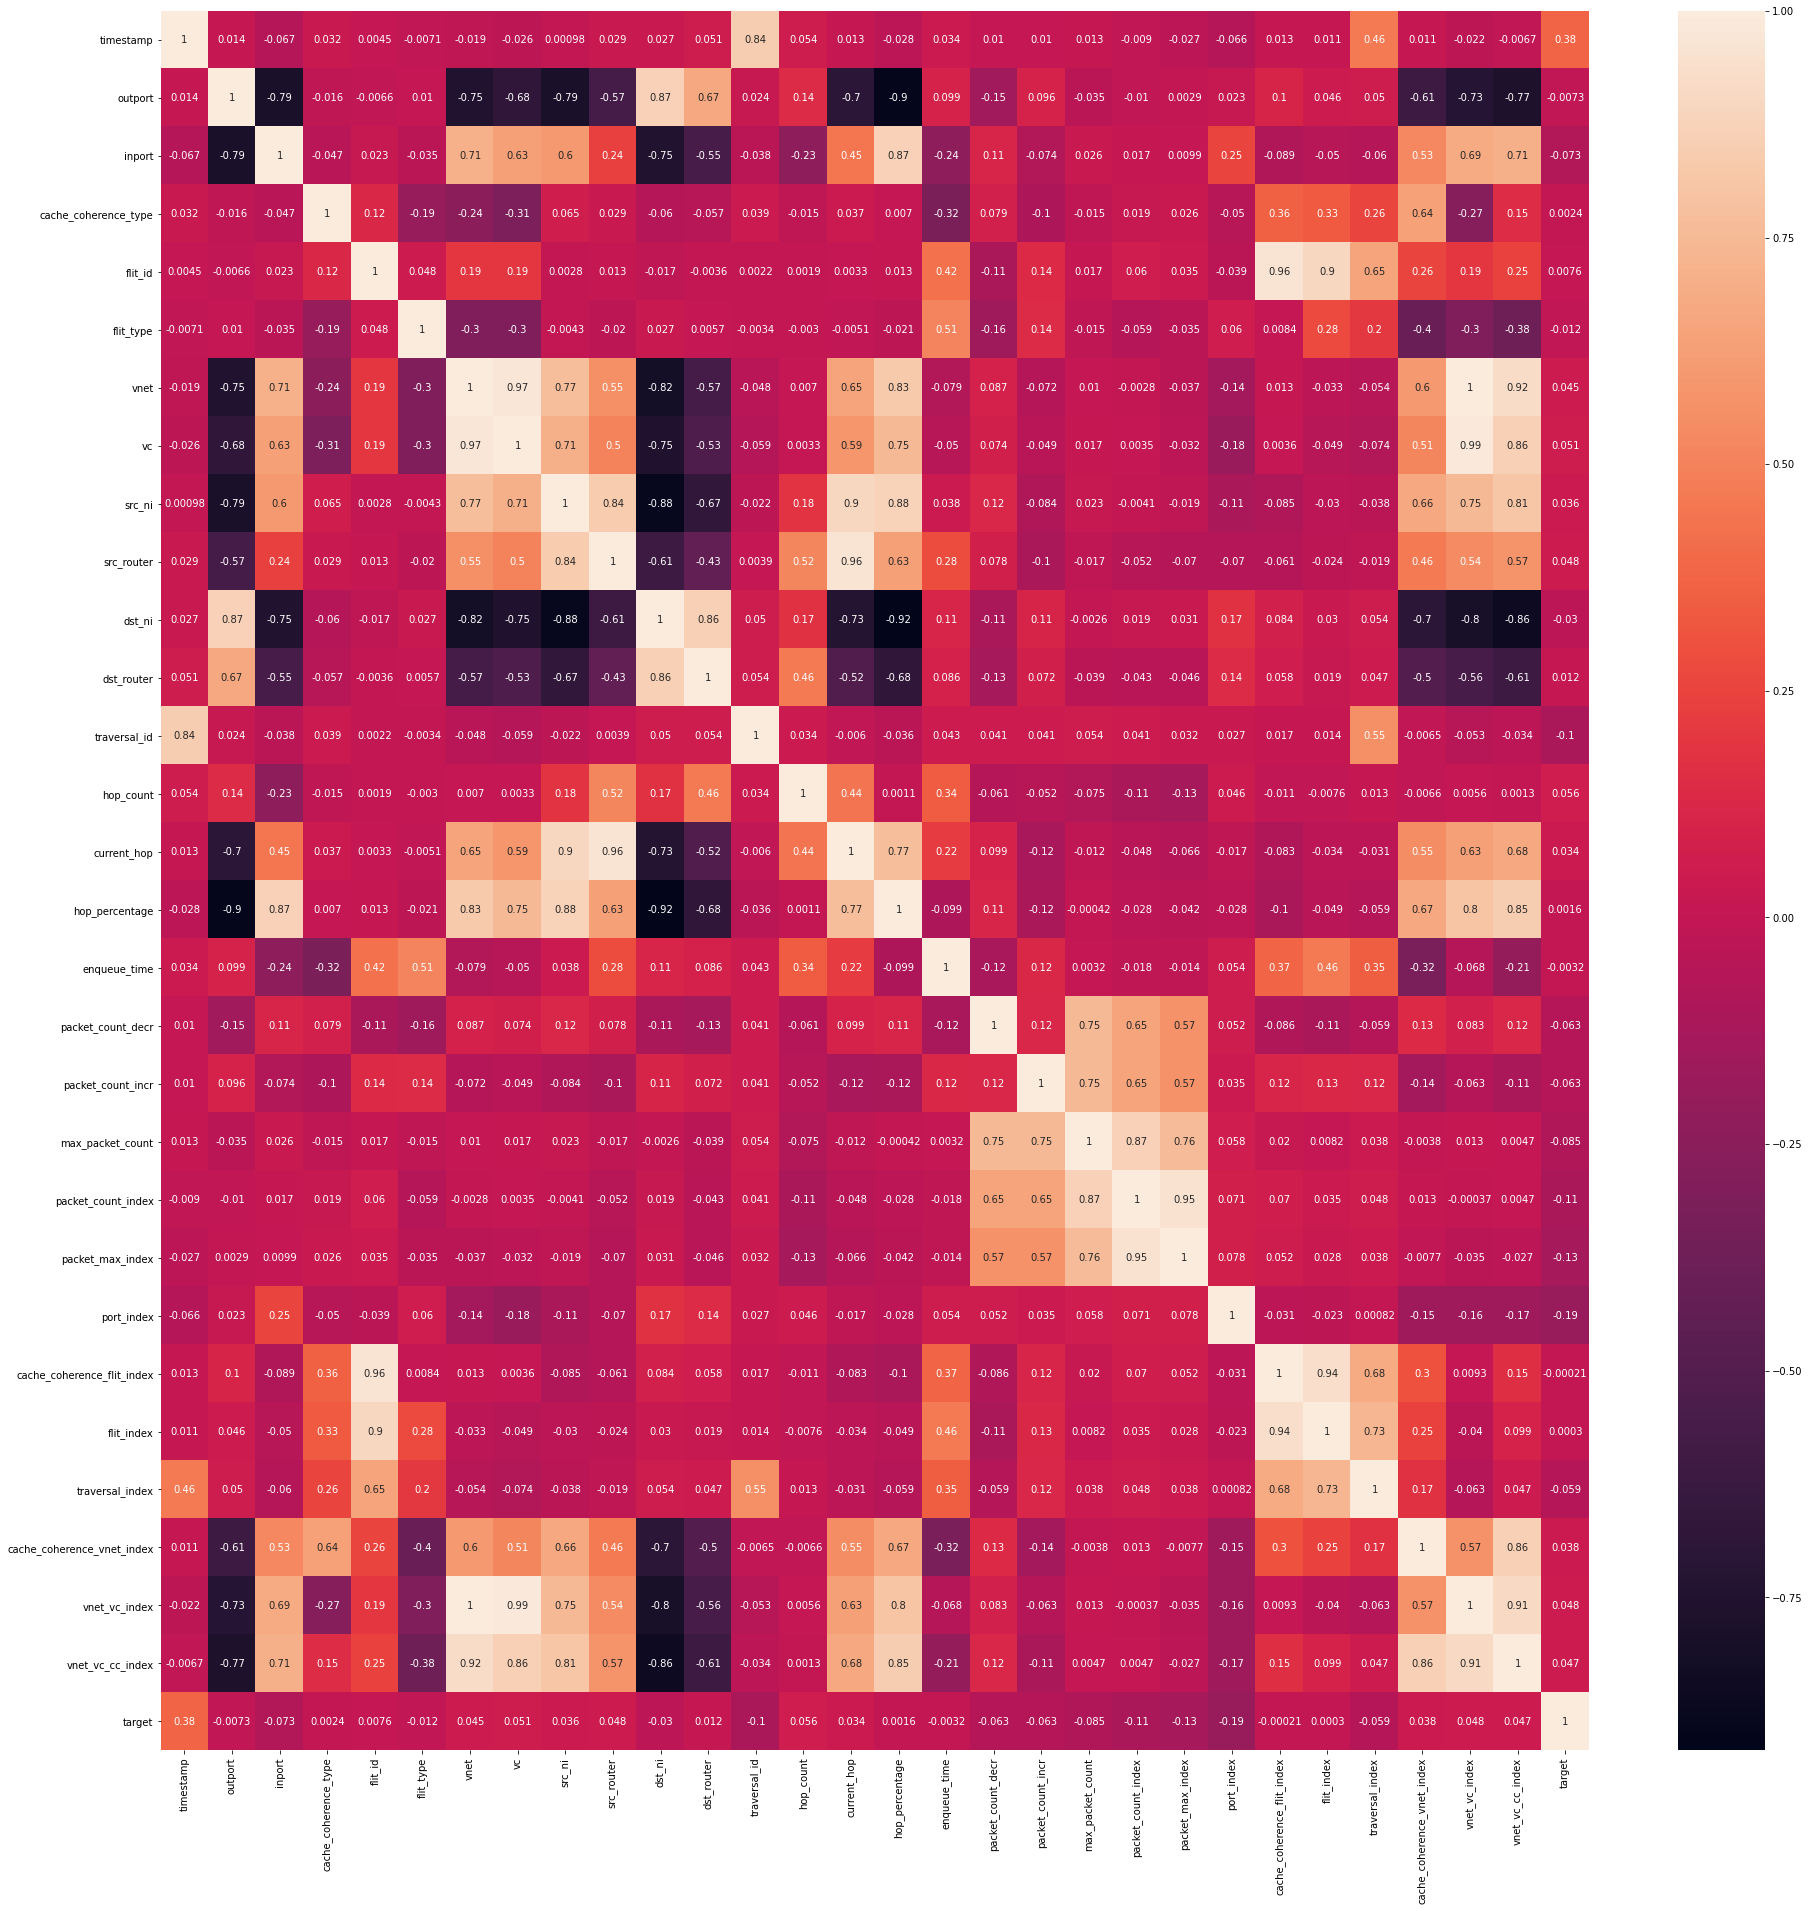

In [13]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [14]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,23,7,0,4,0,0.0,4,6,1,6,6,36,0,1,4,0,3,27,9
1,2,0,1,1,4,3,9,23,7,0,4,0,0.0,4,1,1,1,1,1,0,1,4,0,3,27,9
2,0,2,4,1,1,5,17,0,0,0,2,2,1.0,13,5,2,6,10,60,0,4,4,0,20,85,100
3,0,2,4,2,2,5,17,0,0,0,2,2,1.0,14,4,3,6,12,72,0,8,16,0,20,85,100
4,0,2,4,3,2,5,17,0,0,0,2,2,1.0,15,3,4,6,12,72,0,12,24,0,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105618,2,0,5,2,2,3,11,22,6,10024,3,0,0.0,11,5,7,11,35,385,0,10,20,200480,15,33,45
105619,2,0,5,3,2,3,11,22,6,10024,3,0,0.0,18,4,8,11,32,352,0,15,30,300720,15,33,45
105620,2,0,5,4,2,3,11,22,6,10024,3,0,0.0,25,3,9,11,27,297,0,20,40,400960,15,33,45
105621,2,0,5,5,3,3,11,22,6,10024,3,0,0.0,32,2,10,11,20,220,0,25,75,751800,15,33,45


In [15]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,0.666667,0.000000,0.0,0.000000,0.208333,0.000000,0.208333,0.029762,0.008286,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.741935,0.466667,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,1.0,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.000000,0.000000,0.333333,0.333333,1.0,0.183673,0.166667,0.041667,0.208333,0.053571,0.013968,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,1.0,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.000000,0.000000,0.333333,0.333333,1.0,0.204082,0.125000,0.083333,0.208333,0.065476,0.016809,0.0,0.241379,0.139535,0.000000,0.944444,1.000000,1.000000
4,0.0,1.0,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.000000,0.000000,0.333333,0.333333,1.0,0.224490,0.083333,0.125000,0.208333,0.065476,0.016809,0.0,0.379310,0.232558,0.000000,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105618,1.0,0.0,0.666667,0.25,0.333333,0.0,0.250,0.709677,0.400000,0.904938,0.500000,0.000000,0.0,0.142857,0.166667,0.250000,0.416667,0.202381,0.090909,0.0,0.310345,0.186047,0.201188,0.666667,0.103448,0.395604
105619,1.0,0.0,0.666667,0.50,0.333333,0.0,0.250,0.709677,0.400000,0.904938,0.500000,0.000000,0.0,0.285714,0.125000,0.291667,0.416667,0.184524,0.083097,0.0,0.482759,0.302326,0.301782,0.666667,0.103448,0.395604
105620,1.0,0.0,0.666667,0.75,0.333333,0.0,0.250,0.709677,0.400000,0.904938,0.500000,0.000000,0.0,0.428571,0.083333,0.333333,0.416667,0.154762,0.070076,0.0,0.655172,0.418605,0.402376,0.666667,0.103448,0.395604
105621,1.0,0.0,0.666667,1.00,0.666667,0.0,0.250,0.709677,0.400000,0.904938,0.500000,0.000000,0.0,0.571429,0.041667,0.375000,0.416667,0.113095,0.051847,0.0,0.827586,0.825581,0.754456,0.666667,0.103448,0.395604


In [16]:
train_X[train_X.duplicated()].shape

(355, 26)

In [17]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.790406,-0.015669,-0.006579,0.010260,-0.751970,-0.677207,0.866679,0.671296,0.023929,0.143094,-0.700338,-0.903736,0.098874,-0.147330,0.095596,-0.034554,-0.010302,0.002851,0.023307,0.101018,0.045578,0.049636,-0.610611,-0.728143,-0.771683,-0.007255
inport,-0.790406,1.000000,-0.047279,0.022681,-0.035374,0.711242,0.631137,-0.748764,-0.553036,-0.038312,-0.232469,0.447640,0.871021,-0.236461,0.112307,-0.074024,0.025570,0.017291,0.009885,0.250430,-0.088556,-0.050004,-0.059603,0.526200,0.685035,0.705230,-0.072910
cache_coherence_type,-0.015669,-0.047279,1.000000,0.124621,-0.194361,-0.239823,-0.310646,-0.060461,-0.056551,0.038600,-0.014751,0.036586,0.007002,-0.315747,0.079077,-0.100862,-0.014551,0.018872,0.026380,-0.049842,0.355574,0.334194,0.257858,0.636115,-0.269230,0.152940,0.002444
flit_id,-0.006579,0.022681,0.124621,1.000000,0.047642,0.193325,0.191983,-0.017234,-0.003646,0.002202,0.001945,0.003278,0.013353,0.422861,-0.111090,0.136641,0.017066,0.060202,0.035473,-0.038684,0.957343,0.898405,0.648221,0.256680,0.194189,0.246277,0.007555
flit_type,0.010260,-0.035374,-0.194361,0.047642,1.000000,-0.301513,-0.299421,0.026879,0.005687,-0.003434,-0.003033,-0.005112,-0.020825,0.510252,-0.162911,0.140862,-0.014727,-0.058818,-0.034689,0.060332,0.008354,0.278741,0.202918,-0.400323,-0.302860,-0.384098,-0.011782
vnet,-0.751970,0.711242,-0.239823,0.193325,-0.301513,1.000000,0.970087,-0.817651,-0.572290,-0.048319,0.007010,0.649034,0.829423,-0.078780,0.087113,-0.071650,0.010328,-0.002788,-0.037082,-0.143003,0.012811,-0.033387,-0.054406,0.596521,0.995487,0.922717,0.045098
vc,-0.677207,0.631137,-0.310646,0.191983,-0.299421,0.970087,1.000000,-0.754599,-0.525667,-0.058881,0.003279,0.586176,0.748226,-0.049686,0.074375,-0.049338,0.016723,0.003450,-0.032275,-0.183458,0.003606,-0.049438,-0.074429,0.514196,0.988746,0.864146,0.051211
dst_ni,0.866679,-0.748764,-0.060461,-0.017234,0.026879,-0.817651,-0.754599,1.000000,0.860272,0.049668,0.174836,-0.732821,-0.918945,0.114598,-0.109126,0.105216,-0.002612,0.018888,0.030815,0.169995,0.084375,0.030268,0.053672,-0.699844,-0.798874,-0.856328,-0.029997
dst_router,0.671296,-0.553036,-0.056551,-0.003646,0.005687,-0.572290,-0.525667,0.860272,1.000000,0.054482,0.461637,-0.521117,-0.677013,0.086056,-0.130087,0.071906,-0.038860,-0.043456,-0.046473,0.138242,0.058402,0.018529,0.046728,-0.501601,-0.558174,-0.605013,0.012277
traversal_id,0.023929,-0.038312,0.038600,0.002202,-0.003434,-0.048319,-0.058881,0.049668,0.054482,1.000000,0.034133,-0.006009,-0.035976,0.042542,0.040690,0.040825,0.054445,0.040652,0.031506,0.027167,0.016755,0.014344,0.551678,-0.006491,-0.052794,-0.033859,-0.103607


Principal Component Analysis

In [0]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 1.4578242 , -0.76180659, -0.16287011, ..., -0.23598006,
         0.3339539 ,  0.06988076],
       [ 1.46084456, -0.75765416, -0.16552836, ..., -0.25863372,
         0.371063  , -0.17142257],
       [-1.47386137, -0.60819169, -0.36198194, ..., -0.07721153,
         0.38585413,  0.08733243],
       ...,
       [ 1.07791008,  0.60655802, -0.13233733, ...,  0.20210411,
        -0.43704499,  0.22643029],
       [ 1.09410811,  1.12107551,  0.16839151, ...,  0.20556073,
        -0.48450129,  0.18057934],
       [ 1.28103833, -0.59778999, -0.22099055, ...,  0.09919138,
        -0.54659551,  0.17304536]])

In [0]:
pca.explained_variance_ratio_

array([0.56919685, 0.11550052, 0.07830181, 0.05731943, 0.0480051 ,
       0.03343713, 0.03145841, 0.02216355])

Text(0, 0.5, 'Variance')

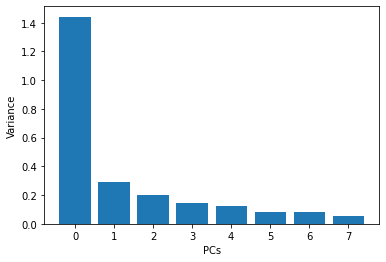

In [0]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [0]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7
0,1.457824,-0.761807,-0.162870,0.723303,-0.247221,-0.235980,0.333954,0.069881
1,1.460845,-0.757654,-0.165528,0.738623,-0.232740,-0.258634,0.371063,-0.171423
2,-1.473861,-0.608192,-0.361982,-0.267482,-0.197205,-0.077212,0.385854,0.087332
3,-1.463522,-0.311516,-0.156732,-0.063016,-0.255449,-0.107676,0.411852,0.076461
4,-1.470741,-0.036648,-0.117368,-0.043669,-0.291923,-0.103968,0.441661,0.080113
...,...,...,...,...,...,...,...,...
105618,1.086030,-0.070554,-0.259815,-0.244777,0.050100,0.190149,-0.441806,0.235005
105619,1.081973,0.268060,-0.196044,-0.183745,0.026999,0.196340,-0.439759,0.233036
105620,1.077910,0.606558,-0.132337,-0.122423,0.004442,0.202104,-0.437045,0.226430
105621,1.094108,1.121076,0.168392,0.132809,-0.033616,0.205561,-0.484501,0.180579


In [0]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,target
0,1.000000e+00,-6.706219e-15,-1.083237e-15,-8.751056e-16,-1.807620e-15,-2.121197e-15,-1.202491e-15,4.286428e-17,-0.022802
1,-6.706219e-15,1.000000e+00,2.149350e-16,-6.720461e-16,-3.786442e-16,-5.306443e-16,-9.578671e-17,-3.115653e-17,0.019681
2,-1.083237e-15,2.149350e-16,1.000000e+00,4.971953e-16,1.286814e-15,3.123535e-16,2.566124e-16,3.367887e-16,-0.080091
3,-8.751056e-16,-6.720461e-16,4.971953e-16,1.000000e+00,-1.740390e-17,1.075297e-15,-3.258243e-16,1.911796e-16,0.013657
4,-1.807620e-15,-3.786442e-16,1.286814e-15,-1.740390e-17,1.000000e+00,4.923113e-16,4.358817e-16,-4.313447e-17,0.057895
5,-2.121197e-15,-5.306443e-16,3.123535e-16,1.075297e-15,4.923113e-16,1.000000e+00,-3.944798e-15,1.333469e-16,-0.158135
6,-1.202491e-15,-9.578671e-17,2.566124e-16,-3.258243e-16,4.358817e-16,-3.944798e-15,1.000000e+00,-9.246483e-16,0.040488
7,4.286428e-17,-3.115653e-17,3.367887e-16,1.911796e-16,-4.313447e-17,1.333469e-16,-9.246483e-16,1.000000e+00,-0.069473
target,-2.280213e-02,1.968121e-02,-8.009084e-02,1.365656e-02,5.789465e-02,-1.581352e-01,4.048818e-02,-6.947323e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

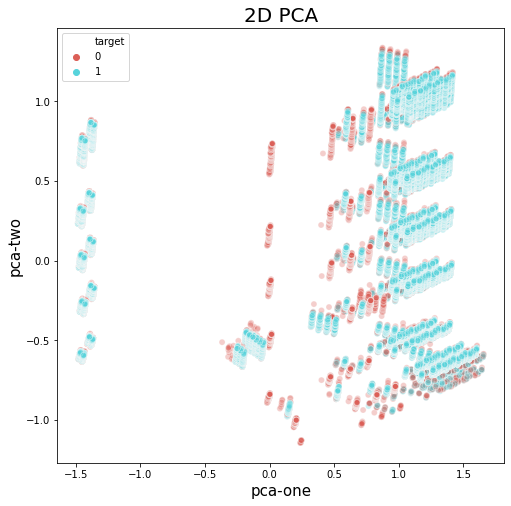

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

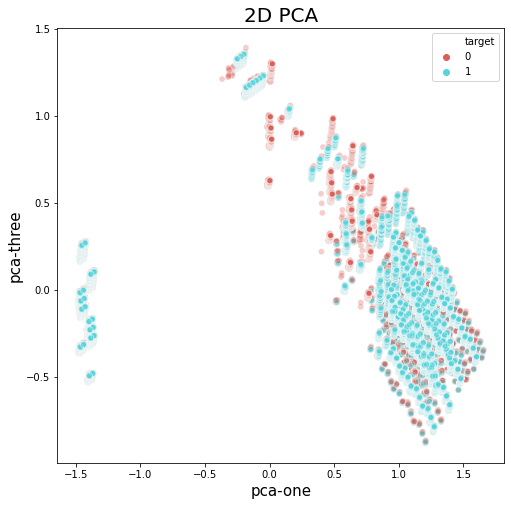

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

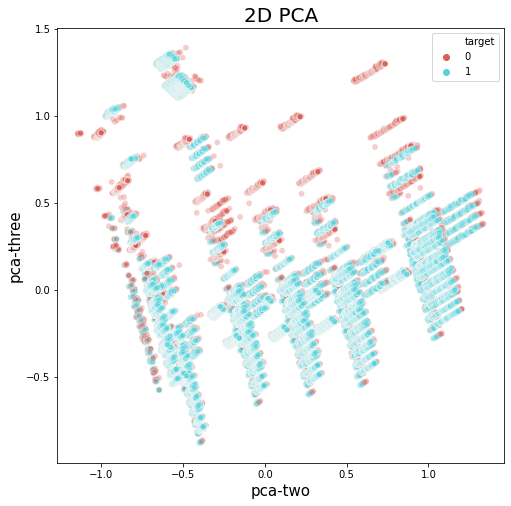

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

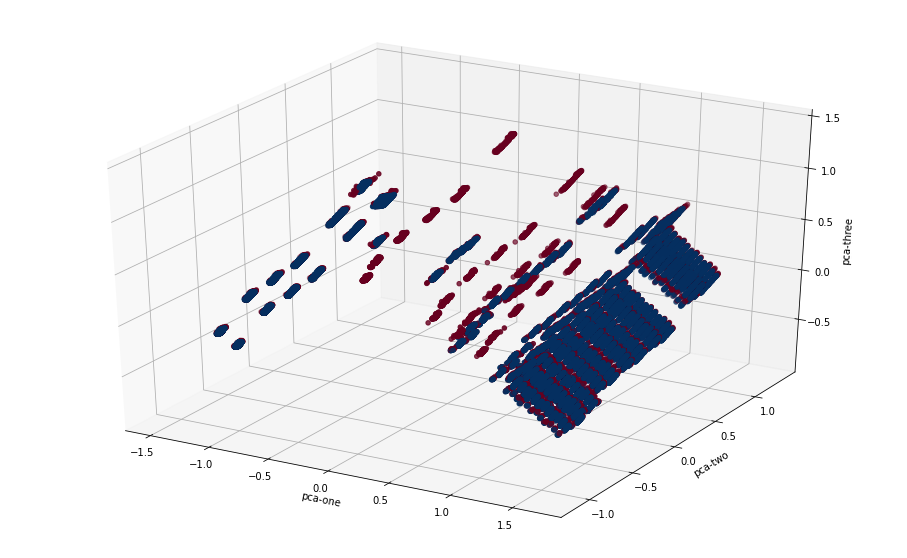

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

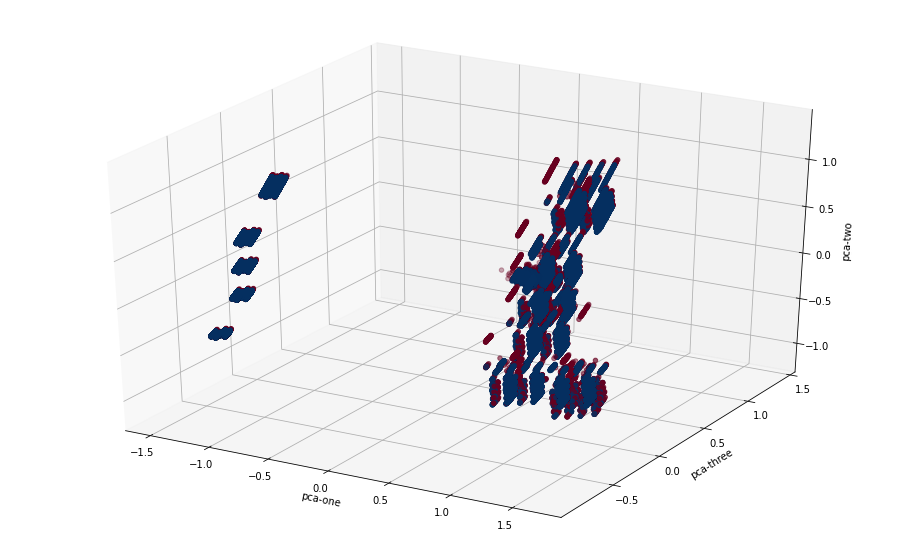

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

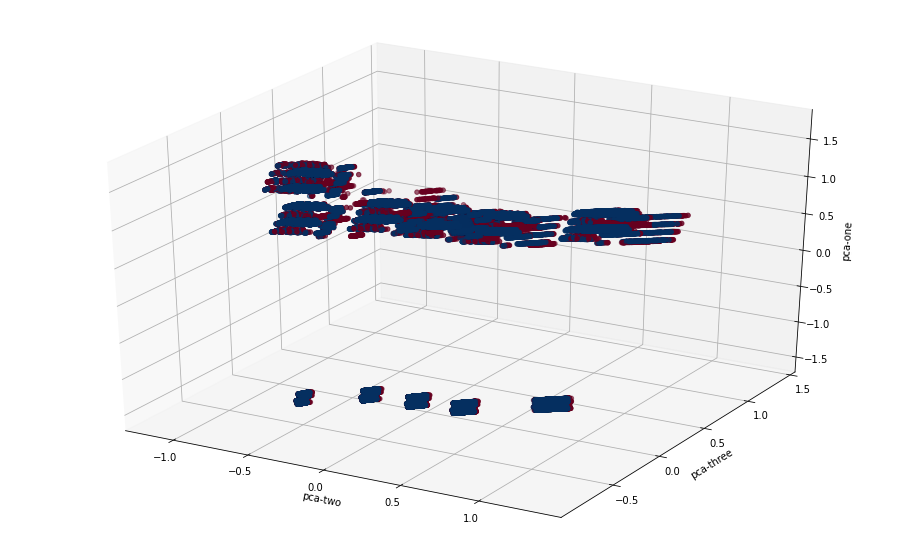

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 478.87291288375854 seconds


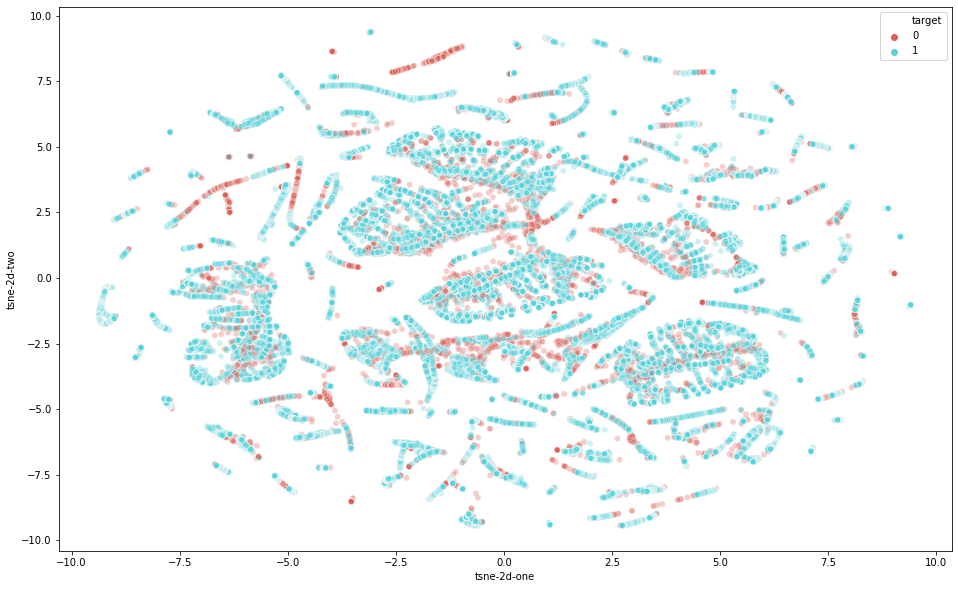

In [0]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

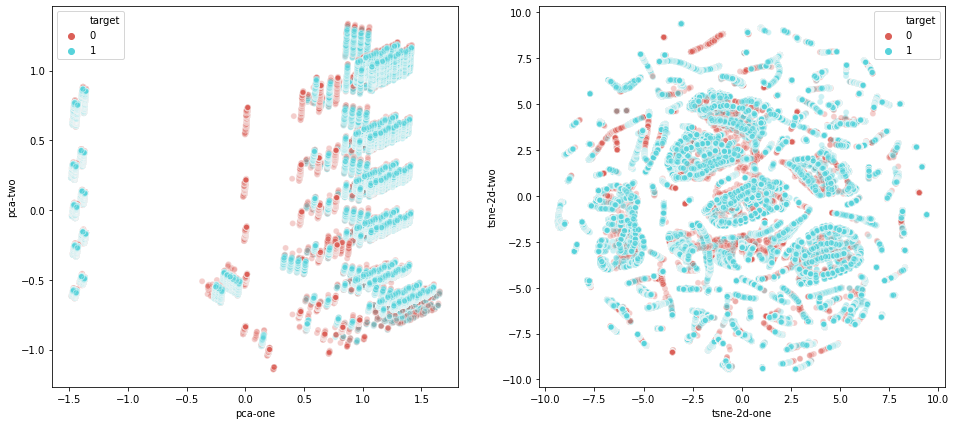

In [0]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 414.91000485420227 seconds


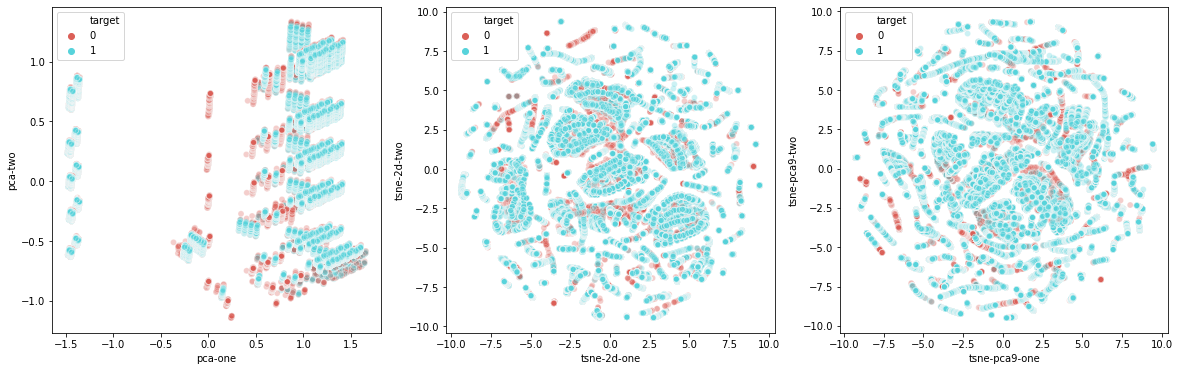

In [0]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [19]:
train_Y = df['target']
train_Y.value_counts()

1    64416
0    41207
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
19                  port_index  2932.744099
1                       inport   213.406264
18            packet_max_index   174.482379
9                 traversal_id   138.524490
17          packet_count_index   129.234372
16            max_packet_count   116.458483
5                         vnet    99.262491
24               vnet_vc_index    93.557214
6                           vc    86.837353
15           packet_count_incr    58.254503
14           packet_count_decr    58.203991
22             traversal_index    48.120159
10                   hop_count    40.407404
11                 current_hop    34.503679
25            vnet_vc_cc_index    34.248732
7                       dst_ni    26.517920
23  cache_coherence_vnet_index    12.900591


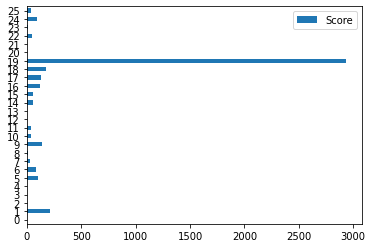

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.629490
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.059      
Dependent Variable:         target                  AIC:                     133021.3194
Date:                       2020-05-08 10:58        BIC:                     133231.8073
No. Observations:           105623                  Log-Likelihood:          -66489.    
Df Model:                   21                      LL-Null:                 -70641.    
Df Residuals:               105601                  LLR p-value:             0.0000     
Converged:                  0.0000                  Scale:                   1.0000     
No. Iterations:             35.0000                                                     
----------------------------------------------------------------------------------------
                            Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------------------------------------

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 65.74948519491586
Test Prediction  65.3491124260355


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
17,packet_count_index,7.917913
5,vnet,0.765963
4,flit_type,0.636886
25,vnet_vc_cc_index,0.617086
23,cache_coherence_vnet_index,0.472524
8,dst_router,0.361973
24,vnet_vc_index,0.217517
10,hop_count,0.148796
2,cache_coherence_type,0.132096
3,flit_id,0.108144


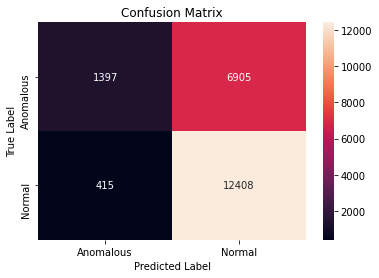

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.17      0.28      8302
           1       0.64      0.97      0.77     12823

    accuracy                           0.65     21125
   macro avg       0.71      0.57      0.52     21125
weighted avg       0.69      0.65      0.58     21125



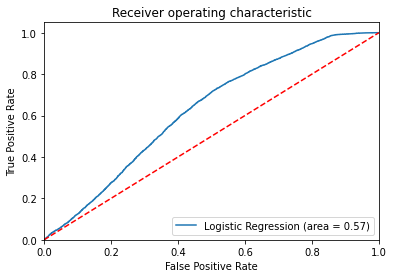

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 82.41496840161898
Test Prediction  73.95976331360947


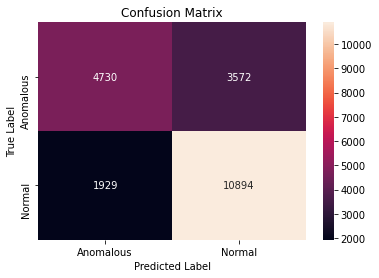

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63      8302
           1       0.75      0.85      0.80     12823

    accuracy                           0.74     21125
   macro avg       0.73      0.71      0.72     21125
weighted avg       0.74      0.74      0.73     21125



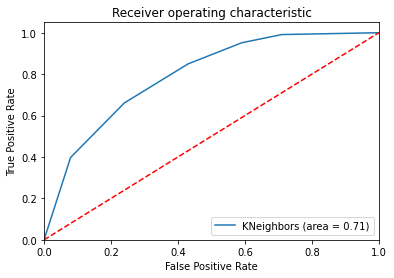

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 63.055930317877355
Test Prediction Score 62.62248520710059


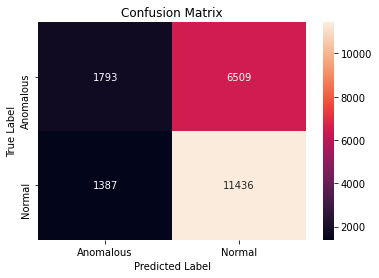

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      0.22      0.31      8302
           1       0.64      0.89      0.74     12823

    accuracy                           0.63     21125
   macro avg       0.60      0.55      0.53     21125
weighted avg       0.61      0.63      0.57     21125



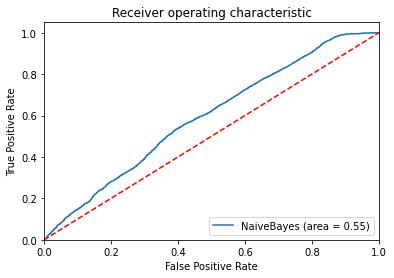

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 67598 samples, validate on 16900 samples
Epoch 1/10
67598/67598 [==============================] - 2s 36us/step - loss: 0.2297 - accuracy: 0.6358 - val_loss: 0.2233 - val_accuracy: 0.6476
Epoch 2/10
67598/67598 [==============================] - 2s 35us/step - loss: 0.2212 - accuracy: 0.6512 - val_loss: 0.2204 - val_accuracy: 0.6448
Epoch 3/10
67598/67598 [==============================] - 2s 35us/step - loss: 0.2189 - accuracy: 0.6534 - val_loss: 0.2188 - val_accuracy: 0.6499
Epoch 4/10
67598/67598 [==============================] - 2s 34us/step - loss: 0.2174 - accuracy: 0.6543 - val_loss: 0.2173 - val_accuracy: 0.6512
Epoch 5/10
67598/67598 [==============================] - 2s 35us/step - loss: 0.2162 - accuracy: 0.6559 - val_loss: 0.2164 - val_accuracy: 0.6540
Epoch 6/10
67598/67598 [==============================] - 2s 34us/step - loss: 0.2153 - accuracy: 0.6572 - val_loss: 0.2155 - val_accuracy: 0.6541
Epoch 7/10
67598/67598 [==============================] - 2s 34us/st

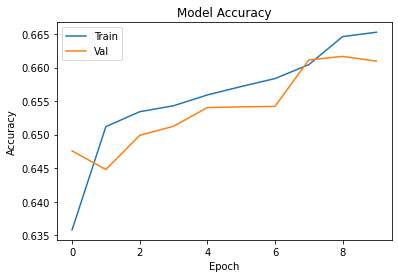

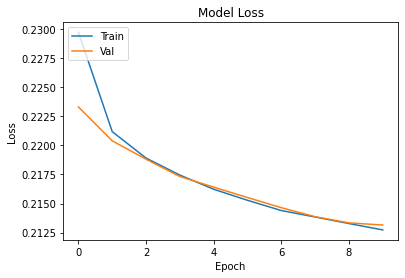

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.97%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 67598 samples, validate on 16900 samples
Epoch 1/15
67598/67598 [==============================] - 2s 35us/step - loss: 0.2390 - accuracy: 0.6113 - val_loss: 0.2358 - val_accuracy: 0.6154
Epoch 2/15
67598/67598 [==============================] - 2s 34us/step - loss: 0.2338 - accuracy: 0.6195 - val_loss: 0.2326 - val_accuracy: 0.6265
Epoch 3/15
67598/67598 [==============================] - 2s 33us/step - loss: 0.2309 - accuracy: 0.6390 - val_loss: 0.2299 - val_accuracy: 0.6458
Epoch 4/15
67598/67598 [==============================] - 2s 33us/step - loss: 0.2282 - accuracy: 0.6479 - val_loss: 0.2272 - val_accuracy: 0.6496
Epoch 5/15
67598/67598 [==============================] - 2s 33us/step - loss: 0.2259 - accuracy: 0.6499 - val_loss: 0.2251 - val_accuracy: 0.6494
Epoch 6/15
67598/67598 [==============================] - 2s 35us/step - loss: 0.2239 - accuracy: 0.6510 - val_loss: 0.2233 - val_accuracy: 0.6492
Epoch 7/15
67598/67598 [==============================] - 2s 34us/st

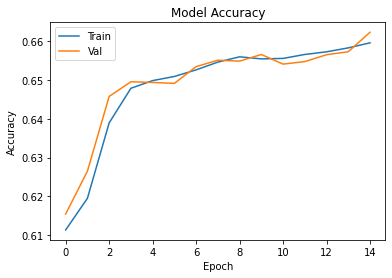

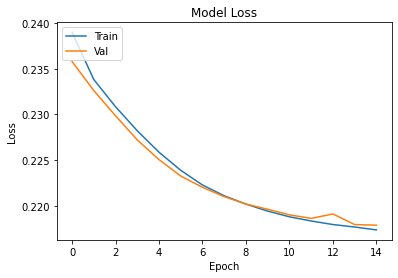

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.03%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 67598 samples, validate on 16900 samples
Epoch 1/30
67598/67598 [==============================] - 3s 37us/step - loss: 0.2371 - accuracy: 0.6109 - val_loss: 0.2355 - val_accuracy: 0.6098
Epoch 2/30
67598/67598 [==============================] - 2s 36us/step - loss: 0.2346 - accuracy: 0.6122 - val_loss: 0.2334 - val_accuracy: 0.6149
Epoch 3/30
67598/67598 [==============================] - 2s 36us/step - loss: 0.2325 - accuracy: 0.6206 - val_loss: 0.2312 - val_accuracy: 0.6289
Epoch 4/30
67598/67598 [==============================] - 2s 37us/step - loss: 0.2302 - accuracy: 0.6380 - val_loss: 0.2289 - val_accuracy: 0.6450
Epoch 5/30
67598/67598 [==============================] - 3s 40us/step - loss: 0.2283 - accuracy: 0.6464 - val_loss: 0.2274 - val_accuracy: 0.6483
Epoch 6/30
67598/67598 [==============================] - 2s 37us/step - loss: 0.2270 - accuracy: 0.6480 - val_loss: 0.2264 - val_accuracy: 0.6496
Epoch 7/30
67598/67598 [==============================] - 3s 37us/st

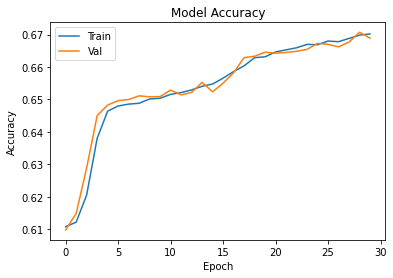

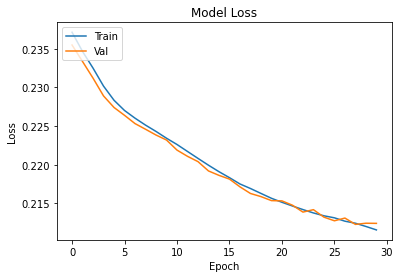

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.75%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 67598 samples, validate on 16900 samples
Epoch 1/100
67598/67598 [==============================] - 5s 70us/step - loss: 0.2161 - accuracy: 0.6591 - val_loss: 0.2032 - val_accuracy: 0.6714
Epoch 2/100
67598/67598 [==============================] - 4s 64us/step - loss: 0.2002 - accuracy: 0.6877 - val_loss: 0.1940 - val_accuracy: 0.6979
Epoch 3/100
67598/67598 [==============================] - 4s 64us/step - loss: 0.1956 - accuracy: 0.6959 - val_loss: 0.1864 - val_accuracy: 0.7207
Epoch 4/100
67598/67598 [==============================] - 5s 68us/step - loss: 0.1922 - accuracy: 0.7055 - val_loss: 0.1871 - val_accuracy: 0.7170
Epoch 5/100
67598/67598 [==============================] - 4s 63us/step - loss: 0.1900 - accuracy: 0.7111 - val_loss: 0.1830 - val_accuracy: 0.7299
Epoch 6/100
67598/67598 [==============================] - 4s 63us/step - loss: 0.1877 - accuracy: 0.7144 - val_loss: 0.1802 - val_accuracy: 0.7266
Epoch 7/100
67598/67598 [==============================] - 4s 

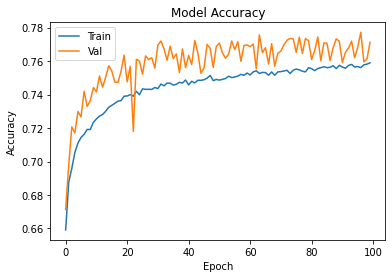

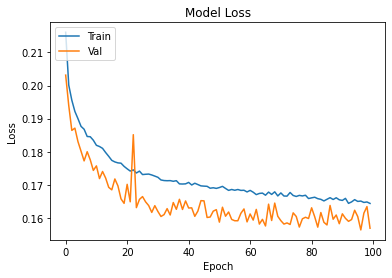

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.27%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8775237283722692


In [0]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.05907832138038
Test Prediction Score 91.60710059171598


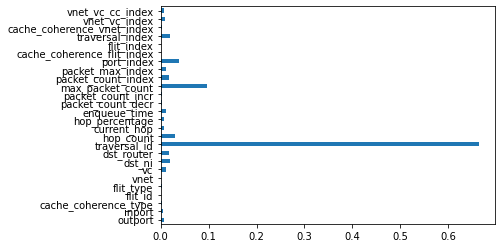

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

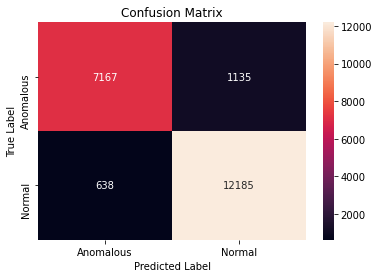

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8302
           1       0.91      0.95      0.93     12823

    accuracy                           0.92     21125
   macro avg       0.92      0.91      0.91     21125
weighted avg       0.92      0.92      0.92     21125



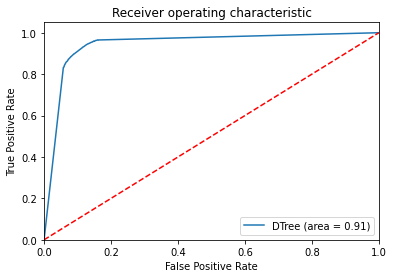

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [0]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.49937276621932
Test Prediction Score 92.41183431952663


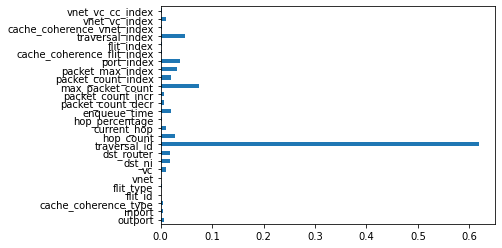

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

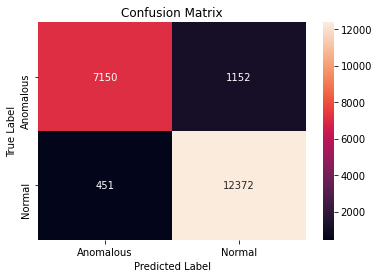

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      8302
           1       0.91      0.96      0.94     12823

    accuracy                           0.92     21125
   macro avg       0.93      0.91      0.92     21125
weighted avg       0.92      0.92      0.92     21125



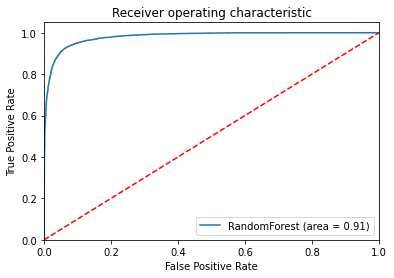

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [0]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.67099813013326
Test Prediction Score 95.22366863905324


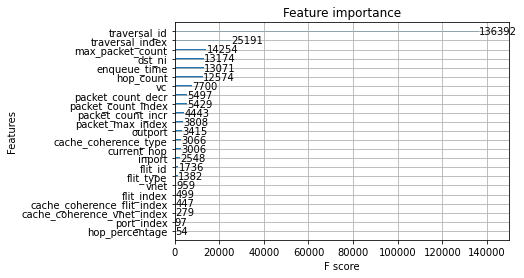

In [0]:
plot_importance(xgbc)
plt.show()

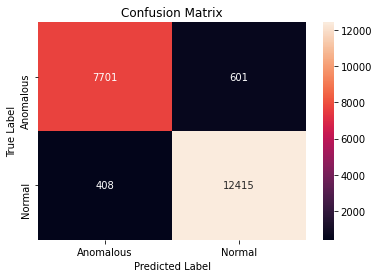

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8302
           1       0.95      0.97      0.96     12823

    accuracy                           0.95     21125
   macro avg       0.95      0.95      0.95     21125
weighted avg       0.95      0.95      0.95     21125



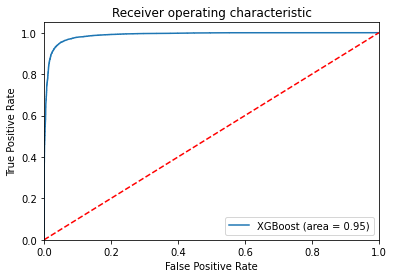

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [22]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [24]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.22223011195531
Test Prediction Score 85.6189349112426


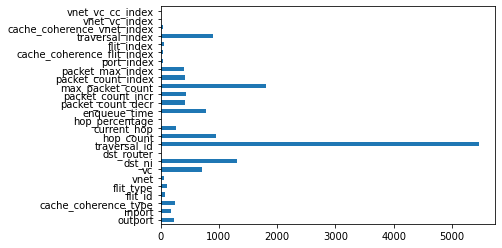

In [25]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

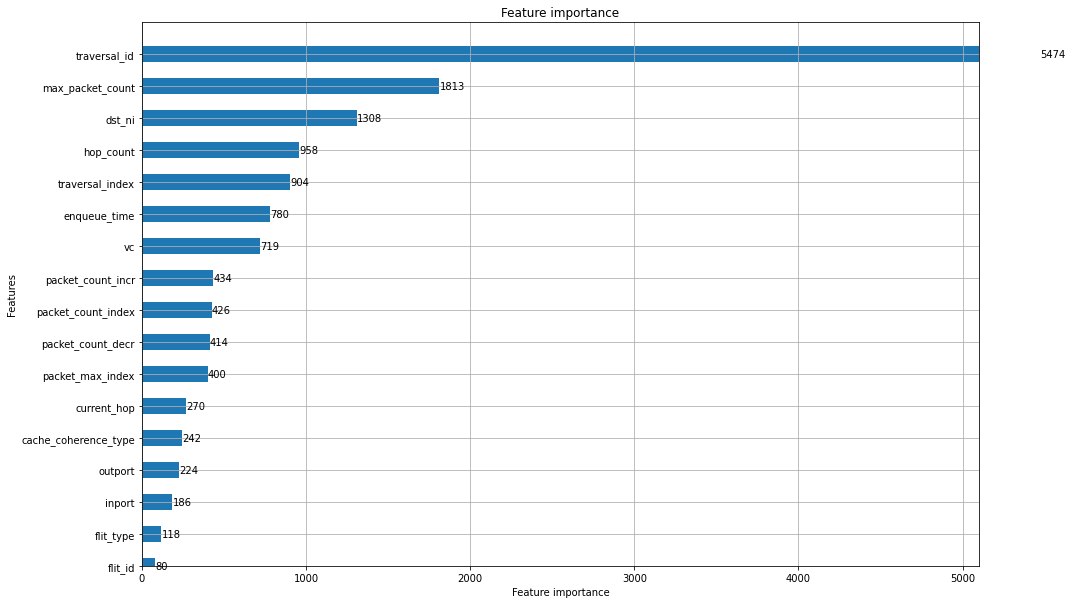

In [26]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [27]:
sorted(gbm.feature_importances_,reverse=True)

[5474,
 1813,
 1308,
 958,
 904,
 780,
 719,
 434,
 426,
 414,
 400,
 270,
 242,
 224,
 186,
 118,
 80,
 54,
 52,
 50,
 45,
 34,
 12,
 2,
 1,
 0]

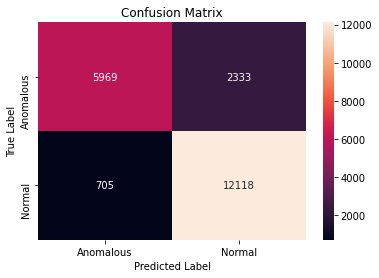

In [28]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      8302
           1       0.84      0.95      0.89     12823

    accuracy                           0.86     21125
   macro avg       0.87      0.83      0.84     21125
weighted avg       0.86      0.86      0.85     21125



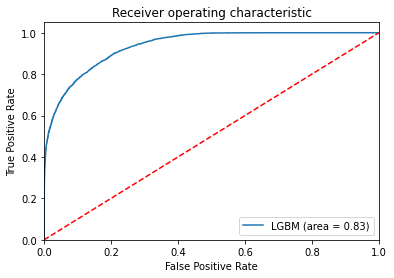

In [30]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()